In this assignment you will use the [pgmpy](http://pgmpy.org/) library to study Bayesian networks and perform inference on them. The library provides the infrastructure to create or import many well-known networks in the [bnlearn](https://www.bnlearn.com/bnrepository/) repository. Specifically, we will be looking at the birth asphyxia [model](https://www.bnlearn.com/bnrepository/discrete-medium.html#child), which describes the relationships between birth asphyxia, complications, symptoms, and diagnoses. 

First, run the following cell to locally install pgmpy and import any necessary functionalities.

In [ ]:
!pip install pgmpy
from pgmpy.utils import get_example_model
child_model = get_example_model('child')
NODES = ['BirthAsphyxia', 'Disease', 'Sick', 'DuctFlow', 'CardiacMixing', 
         'LungParench', 'LungFlow', 'LVH', 'Age', 'Grunting', 'HypDistrib',
         'HypoxiaInO2', 'CO2', 'ChestXray', 'LVHreport', 'GruntingReport',
         'LowerBodyO2', 'RUQO2', 'CO2Report', 'XrayReport']

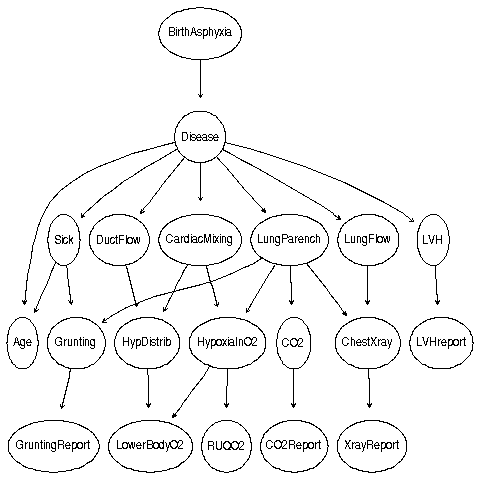

# Problem 1: Independence (20 points)

pgmpy contains several functions for testing independences, which are demonstrated in "Step 4" of this [notebook](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb).
Answer the following questions about the independence properties of the birth asphyxia network. You are encouraged, but not required, to use the independence-checking functions of pgmpy to verify your answers. If you choose to do so, please leave all commands and outputs that you use in the code cell below your responses.

1. Name all pairs of independent variables given no observed evidence in the Bayes net. If no variables are independent, briefly explain why that is the case.
2. List all variable pairs (X, Y) for which "X is conditionally independent of all other 18 variables in the Bayes net, given Y". For example, ('BirthAsphyxia', 'Disease') is such a pair.
3.  Suppose 'Disease' is observed. List all variables that are *not* guaranteed to be independent of 'Age'. Briefly explain how you know that the remaining variables are guaranteed independent. 
4.  Suppose 'Disease' is observed. Name a second variable that, if observed, would cause 'Age' to lose at least one guarantee of independence. Briefly explain why they change the independence properties.


ENTER YOUR RESPONSES HERE

1.  No variables are independent. This is because given no observed evidence, the only collider occurs at common effect. However, for every common effect, they share a common cause to reduce the collider. So there are no independent variables. 
2.  (BirthAsphyxia, Disease), (LVHreport, LVH), (GruntingReport, Grunting), (RUQO2, HypoxiaInO2), (CO2Report, CO2), (XrayReport, ChestXray)
3.  
Not guaranteed independent: (Sick,Grunting,GruntingReport)

Guaranteed independent: (BirthAsphyxia, DuctFlow,CardiacMixing, LungParench, LungFlow, LVH, HypDistrib, HypoxiaInO2, CO2, ChestXray, LVHreport, LowerBodyO2, RUQO2, CO2Report, XrayReport)

Reason for Guaranteed independence: Because they share a common cause to form a collider. 
4.  Given another variable "Grunting", if observed, would cause 'Age' to lose guarantee of independence of 'LungParench'. This is because given "Grunting" would remove the collider between 'sick' and 'LungParench' (common effect). This connects 'LungParench' and 'Age'. 

In [ ]:
# ENTER ANY CODE YOU USE TO HELP ANSWER THE ABOVE QUESTIONS HERE
#1
for x in NODES:
  for y in NODES:
    if not child_model.is_active_trail(x,y):
      print (x,y)

In [ ]:
#2
for x in NODES:
  for y in NODES:
    if x == y:
      continue
    t = NODES.copy()
    t.remove(x)
    tmp = [not child_model.is_active_trail(x,z,observed=[y]) for z in t]
    if (False not in tmp):
      print (x,y)

BirthAsphyxia Disease
LVHreport LVH
GruntingReport Grunting
RUQO2 HypoxiaInO2
CO2Report CO2
XrayReport ChestXray


In [ ]:
#3 
print (child_model.local_independencies('Age'))
tmp = []
for z in NODES:
  if z == 'Age' or z == "Disease":
    continue
  if (not child_model.is_active_trail('Age',z,observed=['Disease'])):
    print (z)
    tmp.append(z)

(Age _|_ BirthAsphyxia, LVHreport, HypDistrib, CO2Report, GruntingReport, HypoxiaInO2, Grunting, LVH, CardiacMixing, ChestXray, LungFlow, LungParench, LowerBodyO2, CO2, DuctFlow, XrayReport, RUQO2 | Disease, Sick)
BirthAsphyxia
DuctFlow
CardiacMixing
LungParench
LungFlow
LVH
HypDistrib
HypoxiaInO2
CO2
ChestXray
LVHreport
LowerBodyO2
RUQO2
CO2Report
XrayReport


In [ ]:
t = NODES.copy()
t.remove('Age')
t. remove("Disease")
for z in t:
  if z not in tmp:
    print (z)

Sick
Grunting
GruntingReport


In [ ]:
len(tmp)

15

In [ ]:
#4
for x in NODES:
  temp = []
  for z in NODES:
    if z == 'Age' or z == "Disease" or z == x:
      continue
    if (not child_model.is_active_trail('Age',z,observed=['Disease',x])):
      temp.append(z)
  if len(temp) < len(tmp) - 1:
    print (x)
    print (temp)
    print (tmp)
    print (Diff(temp,tmp))

Grunting
['BirthAsphyxia', 'DuctFlow', 'CardiacMixing', 'LungFlow', 'LVH', 'HypDistrib', 'LVHreport', 'GruntingReport']
['BirthAsphyxia', 'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow', 'LVH', 'HypDistrib', 'HypoxiaInO2', 'CO2', 'ChestXray', 'LVHreport', 'LowerBodyO2', 'RUQO2', 'CO2Report', 'XrayReport']
['GruntingReport', 'LungParench', 'CO2Report', 'LowerBodyO2', 'CO2', 'HypoxiaInO2', 'XrayReport', 'ChestXray', 'RUQO2']
GruntingReport
['BirthAsphyxia', 'DuctFlow', 'CardiacMixing', 'LungFlow', 'LVH', 'HypDistrib', 'LVHreport']
['BirthAsphyxia', 'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow', 'LVH', 'HypDistrib', 'HypoxiaInO2', 'CO2', 'ChestXray', 'LVHreport', 'LowerBodyO2', 'RUQO2', 'CO2Report', 'XrayReport']
['LungParench', 'CO2Report', 'LowerBodyO2', 'CO2', 'HypoxiaInO2', 'XrayReport', 'ChestXray', 'RUQO2']


In [ ]:
#https://www.geeksforgeeks.org/python-difference-two-lists/
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [ ]:
#check
child_model.is_active_trail('Age','LungParench',observed=['Disease','Grunting'])

True

In addition to its structure, the Bayes net model also specifies the parameters (probabilities). These conditional probability distributions, or CPDs, are stored as tables. Each column corresponds to the CPD of the variable of interest given a combination of its parents' values. 

For example, take the second table in the output below, the CPD for 'Disease'. The first column is the distribution $\Pr(Disease \mid BirthAsphyxia=yes)$ (which sums to 1). The first row is the "distribution" $\Pr(Disease=PFC \mid BirthAsphyxia)$ (which does not sum to 1).

The tables can be accessed as follows (you will be using all these tables in the following problem):

In [ ]:
print(child_model.get_cpds('BirthAsphyxia'))
print("")
print(child_model.get_cpds('Disease'))
print("")
print(child_model.get_cpds('Sick'))
print("")
print(child_model.get_cpds('LungParench'))
print("")
print(child_model.get_cpds('Grunting'))
print("")
print(child_model.get_cpds('GruntingReport'))

+--------------------+-----+
| BirthAsphyxia(yes) | 0.1 |
+--------------------+-----+
| BirthAsphyxia(no)  | 0.9 |
+--------------------+-----+

+-----------------+--------------------+-------------------+
| BirthAsphyxia   | BirthAsphyxia(yes) | BirthAsphyxia(no) |
+-----------------+--------------------+-------------------+
| Disease(PFC)    | 0.2                | 0.03061224        |
+-----------------+--------------------+-------------------+
| Disease(TGA)    | 0.3                | 0.33673469        |
+-----------------+--------------------+-------------------+
| Disease(Fallot) | 0.25               | 0.29591837        |
+-----------------+--------------------+-------------------+
| Disease(PAIVS)  | 0.15               | 0.23469388        |
+-----------------+--------------------+-------------------+
| Disease(TAPVD)  | 0.05               | 0.05102041        |
+-----------------+--------------------+-------------------+
| Disease(Lung)   | 0.05               | 0.05102041        |


# Problem 2: Exact Inference (30 points)

For these questions, write the analytical expression for each of the queries in terms of the CPD parameters. You can take advantage of normalization to simplify these expressions. Then plug in the parameters from the model to compute the requested values. (Note that pgmpy does contain functionality for performing inference, as shown in Section 4 of this [notebook](https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/2.%20Bayesian%20Networks.ipynb). While you can use this to check your solution, we are looking for the correct analytical expressions used to derive it.)

**Note**: Please be precise with RV notation. Upper-case RVs should only refer to the queried distribution, while lower-case RVs should refer to either observed RVs or dummy RVs being summed over.

1.   Compute the distribution $\Pr(Sick \mid BirthAsphyxia = yes)$. For compactness, you can write $\Pr(S \mid ba)$.
2.   Compute the distribution $\Pr(Grunting \mid Disease = PFC, Sick = yes)$. For compactness, you can write $\Pr(G \mid d, s)$.
3.   Compute the distribution $\Pr(GruntingReport \mid Disease = PFC, Sick = yes)$. For compactness, you can write $\Pr(GR \mid d, s)$. Briefly explain why these probabilities are not identical to those of the previous part. (Hint: Can you start from your result from the previous part?)

ENTER YOUR SOLUTIONS HERE

1. 
  
$\Pr(Sick, BirthAsphyxia)$ = $ \sum_{d\in Disease} \Pr(Sick \mid Disease) \Pr(Disease \mid BirthAsphyxia) \Pr(BirthAsphyxia)$ 

$\Pr(Sick|BirthAsphyxia = yes)$ = $\frac {\Pr(Sick, BirthAsphyxia = yes)} {\Pr(BirthAsphyxia = yes)} $

By the first equation, we could get the joint distribution of Sick and BirthAsphyxia. Since we just want the BirthAsphyxia = yes probability, we could get this table instead:
\begin{array}{c|c|c}
\text{S}&\text{BA}&\text{Pr(S|BA)}\\
\hline
yes&yes&0.335\\
no&yes&0.665
\end{array}

In tha table,
0.335 = $\Pr(Sick(yes) \mid Disease(PFC)) \Pr(Disease(PFC) \mid BirthAsphyxia(yes))$ + 
$\Pr(Sick(yes) \mid Disease(TGA))\Pr(Disease(TGA) \mid BirthAsphyxia(yes)$ + 
$\Pr(Sick(yes) \mid Disease(Fallot))\Pr(Disease(Fallot) \mid BirthAsphyxia(yes)$ +
$\Pr(Sick(yes) \mid Disease(PAIVS))\Pr(Disease(PAIVS) \mid BirthAsphyxia(yes)$ + 
$\Pr(Sick(yes) \mid Disease(TAPVD))\Pr(Disease(TAPVD) \mid BirthAsphyxia(yes)$ + 
$\Pr(Sick(yes) \mid Disease(Lung))\Pr(Disease(Lung) \mid BirthAsphyxia(yes)$
 = 0.4 * 0.2 + 0.3 * 0.3 + 0.2 * 0.25 + 0.3 * 0.15 +0.7 * 0.05+0.7 * 0.05 = 0.33499 = 0.335

 0.665 could be computed similarly by just replacing Sick(yes) with Sick(no).

Normalization is omited in this case, since 0.335 + 0.665 = 1
2.   P(G = yes|D =PFC, S = yes) = 0.2 * 0.6+0.4 * 0.1 + 0.8 * 0.3 = 0.4
P(G = no| D = PFC, S = yes) = 0.8 * 0.6+0.6 * 0.1 + 0.2 * 0.3 = 0.6

3.   P(GR|d,s) = P(GR|G,d,s)P(G|d,s)
We can reuse our result from 2:
We get the following:
P(GR = yes|d,s) = 0.8 * 0.4+0.1 * 0.6 = 0.38
P(GR = no|d,s) = 0.2 * 0.4+0.9 * 0.6 = 0.62

The difference is because this equation P(GR|d,s) = P(GR|G,d,s)P(G|d,s). (GR is a child of G in this case)

In [ ]:
#1
from pgmpy.inference import VariableElimination
infer = VariableElimination(child_model)
g_dist = infer.query(['Sick'],evidence={'BirthAsphyxia': 'yes'})
print(g_dist)

Eliminating: RUQO2: 100%|██████████| 18/18 [00:00<00:00, 76.69it/s]

+-----------+-------------+
| Sick      |   phi(Sick) |
+===========+=============+
| Sick(yes) |      0.3350 |
+-----------+-------------+
| Sick(no)  |      0.6650 |
+-----------+-------------+


In [ ]:
#2
g_dist = infer.query(['Grunting'],evidence={'Disease': 'PFC', 'Sick':'yes'})
print(g_dist)

Eliminating: RUQO2: 100%|██████████| 17/17 [00:00<00:00, 231.10it/s]

+---------------+-----------------+
| Grunting      |   phi(Grunting) |
+===============+=================+
| Grunting(yes) |          0.4000 |
+---------------+-----------------+
| Grunting(no)  |          0.6000 |
+---------------+-----------------+


In [ ]:
#3
g_dist = infer.query(['GruntingReport'],evidence={'Disease': 'PFC', 'Sick':'yes'})
print(g_dist)

Eliminating: RUQO2: 100%|██████████| 17/17 [00:00<00:00, 178.14it/s]

+---------------------+-----------------------+
| GruntingReport      |   phi(GruntingReport) |
+=====================+=======================+
| GruntingReport(yes) |                0.3800 |
+---------------------+-----------------------+
| GruntingReport(no)  |                0.6200 |
+---------------------+-----------------------+


# Sampling Algorithms

While exact inference will always get us the right values, the amount of computation increases dramatically for larger Bayesian networks. Approximate inference via sampling is an alternative method. The ```prior_sample``` function below generates a sample for a pgmpy Bayes net in the manner of prior sampling. It samples values one node at a time, assuming that nodes are ordered such that no node occurs before its parents. We also define a ```prob_given_parents``` utility function to interface with the underlying pgmpy CPD structures.

(pgmpy also contains built-in sampling algorithms, but we will not be using them.)

In [ ]:
import numpy.random as npr

def prior_sample(model, nodes):
  """
  Generates and returns a single sample as a {variable: value} dictionary
  """
  sample = {}
  for n in nodes:
    cpd = model.get_cpds(n)
    values = (cpd.state_names)[n]
    probs = prob_given_parents(cpd, sample)
    sample[n] = npr.choice(values, p=probs)
  return sample


def prob_given_parents(cpd, sample):
  """
  Returns probability distribution of the node to which cpd corresponds, 
  conditioned on its parents' values in sample
  """
  factors = cpd.variables
  states = cpd.state_names 

  col = 0
  skip = 1
  for i in range(len(factors)-1):
    parent_var = factors[-i-1]
    parent_val = sample[parent_var]
    ind = states[parent_var].index(parent_val)
    col += ind*skip
    skip *= len(states[parent_var])

  return (cpd.get_values())[:,col]  

## Coding 1 (15 points)

Prior sampling does not take into account evidence variables, so we can implement a rejection sampling function that uses ```prior_sample```, followed by a check for consistency with provided evidence. The function below takes in the problem ```model``` and list of ```nodes``` (to be passed into ```prior_sample```), a query variable, the number of samples to attempt, and a dictionary of evidence variables and values. The estimated distribution of the query variable (also a dictionary) and the number of consistent samples generated should then be returned.

In [ ]:
def check_sample(sample, evidence):
  for key in evidence:
      if sample[key] != evidence[key]:
        return True
  return False

In [ ]:
def rejection_sample(model, nodes, N, query, evidence={}):
  """
  INPUTS: Problem model, nodes, total number of samples to try (including 
  inconsistent ones), query variable, and a {variable: value} evidence dict
  OUTPUTS: dist, a dictionary providing the estimated distribution for query
           num_consistent, number of consistent samples generated
  """
  dist = {val:0 for val in model.get_cpds(query).state_names[query]}
  num_consistent = 0
  for n in range(N):
    sample = prior_sample(model,nodes)
    if check_sample(sample,evidence): continue
    num_consistent += 1
    dist[sample[query]] += 1
  for key in dist:
    dist[key] /= num_consistent
  return dist, num_consistent

In [ ]:
dist, num_samples = rejection_sample(child_model, NODES, 20000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)
print("Number of consistent samples: ", num_samples)

XrayReport given BirthAsphyxia = yes:  {'Normal': 0.25835866261398177, 'Oligaemic': 0.29432624113475175, 'Plethoric': 0.20820668693009117, 'Grd_Glass': 0.0729483282674772, 'Asy/Patchy': 0.1661600810536981}
Number of consistent samples:  1974


In [ ]:
dist, num_samples = rejection_sample(child_model, NODES, 1000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)
print("Number of consistent samples: ", num_samples)

{'Normal': 0, 'Oligaemic': 0, 'Plethoric': 0, 'Grd_Glass': 0, 'Asy/Patchy': 0}
XrayReport given BirthAsphyxia = yes:  {'Normal': 0.32727272727272727, 'Oligaemic': 0.23636363636363636, 'Plethoric': 0.21818181818181817, 'Grd_Glass': 0.05454545454545454, 'Asy/Patchy': 0.16363636363636364}
Number of consistent samples:  110


In [4]:
#R1 q2
import numpy as np
v1 = np.array([0.2507,0.2885,0.2069,0.0867,0.1672])

In [5]:
v2 = np.array([0.32727272727272727,0.23636363636363636,0.21818181818181817,0.05454545454545454,0.16363636363636364])

In [9]:
np.average(np.abs(v1-v2)/v1)

0.18657276492260896

In [ ]:
((0.32727272727272727 - 0.2507)/0.2507 - (0.23636363636363636 - 0.2885)/0.2885 + (0.21818181818181817 - 0.2069)/0.2069 - (0.05454545454545454 - 0.0867)/0.0867 - (0.16363636363636364 - 0.1672)/0.1672)/5

0.18657276492260896

## Response 1 (10 points)

Running the above cell will estimate the distribution of 'XrayReport' given 'BirthAsphyxia' = 'yes' by requesting 20000 samples. If you implemented rejection sampling correctly, the estimated distribution should be on average within about 5% of the true distribution: ```{'Normal': 0.2507, 'Oligaemic': 0.2885, 'Plethoric': 0.2069, 'GrdGlass': 0.0867, 'Asy/Patchy': 0.1672}```

1.  How many samples were actually consistent with the evidence and usable? Which probability does the fraction of consistent samples correspond to?

2.  What happens to the estimated distribution when we request fewer samples? Give an average percentage difference between the estimated and true distribution for 1000 requested samples (show the code output above).

ENTER YOUR RESPONSES HERE

1. 

In this current run, the number of consistent samples are 1974.
The probability:
1974/20000 = 9.87%

2. 
if we request fewer samples, the estimated distribution is more deviated from the true distribution. 
An average percentage difference is around 19% between the estimated distribution and the true distribution. 
The calculation result is displayed above under #R1 q2

## Coding 2 (15 points)

Rejection sampling can end up rejecting a large number of samples, wasting effort. Another sampling method is likelihood weighting, which guarantees that every sample is consistent and associates with each a weight. In the cell below we've partially implemented ```weighted_sample```, which generates a sample consistent with ```evidence```, along with the corresponding weight for that sample.

First complete ```weighted_sample``` to correctly update the weight ```w``` whenever an evidence variable is assigned to a sample.

Then complete ```likelihood_weighting```, which should be very similar to ```rejection_sample``` but without the consistency check. It should compute and return a distribution for ```query``` based on the weights returned by ```weighted_sample```.

In [ ]:
def weighted_sample(model, nodes, evidence):
  """
  Generate a sample consistent with evidence, along with corresponding weight
  """
  w = 1
  sample = {}
  for n in nodes:
    cpd = model.get_cpds(n)
    values = (cpd.state_names)[n]
    if n in evidence:
      # YOUR CODE HERE
      sample[n] = evidence[n]
      index = values.index(sample[n])
      w *= prob_given_parents(cpd,sample)[index]
    else:
      probs = prob_given_parents(cpd, sample)
      sample[n] = npr.choice(values, p=probs)
  return sample, w


def likelihood_weighting(model, nodes, N, query, evidence={}):
  """
  INPUTS: Problem model, nodes, query variable, number of samples, 
          and a {variable: value} evidence dict
  OUTPUT: dist, a dictionary providing the estimated distribution for query
  """
  dist = {val:0 for val in model.get_cpds(query).state_names[query]}
  # YOUR CODE HERE
  for n in range(N):
    sample, w = weighted_sample(model,nodes,evidence)
    dist[sample[query]] += w
  sum = 0
  for key in dist:
    sum += dist[key]
  for key in dist:
    dist[key] /= sum
  return dist

In [ ]:
dist = likelihood_weighting(child_model, NODES, 20000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)

XrayReport given BirthAsphyxia = yes:  {'Normal': 0.2526000000000061, 'Oligaemic': 0.2841500000000111, 'Plethoric': 0.20709999999999884, 'Grd_Glass': 0.08759999999999124, 'Asy/Patchy': 0.16854999999999268}


In [ ]:
# CHANGE THE NUMBER OF SAMPLES BELOW
dist = likelihood_weighting(child_model, NODES, 20000, 'Disease', evidence={'GruntingReport':'yes', 'LowerBodyO2':'<5', 'RUQO2':'<5', 'CO2Report':'<7.5', 'XrayReport':'Oligaemic'})
print("Disease given reported evidence: ", dist)

Disease given reported evidence:  {'PFC': 0.04492198553446674, 'TGA': 0.1985892940968425, 'Fallot': 0.3624114920270302, 'PAIVS': 0.34135987858547456, 'TAPVD': 0.02394297555556344, 'Lung': 0.02877437420062263}


In [ ]:
dist = likelihood_weighting(child_model, NODES, 4000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)

XrayReport given BirthAsphyxia = yes:  {'Normal': 0.2587499999999982, 'Oligaemic': 0.2812499999999971, 'Plethoric': 0.20375000000000085, 'Grd_Glass': 0.08775000000000133, 'Asy/Patchy': 0.16850000000000256}


In [10]:
v2 = np.array([0.2587499999999982,0.2812499999999971,0.20375000000000085,0.08775000000000133,0.16850000000000256])

In [11]:
np.average(np.abs(v1-v2)/v1)

0.018470133385435763

In [ ]:
# CHANGE THE NUMBER OF SAMPLES BELOW
dist = likelihood_weighting(child_model, NODES, 4000, 'Disease', evidence={'GruntingReport':'yes', 'LowerBodyO2':'<5', 'RUQO2':'<5', 'CO2Report':'<7.5', 'XrayReport':'Oligaemic'})
print("Disease given reported evidence: ", dist)

Disease given reported evidence:  {'PFC': 0.026599920835460773, 'TGA': 0.22284534327654554, 'Fallot': 0.37852916134379117, 'PAIVS': 0.31879661310461727, 'TAPVD': 0.025767215710312767, 'Lung': 0.027461745729272413}


## Response 2 (10 points)

1.  To estimate the distribution of 'XrayReport' given 'BirthAsphyxia', we again request 20000 samples. However, you can try a smaller number of samples. What is the smallest number of samples to be sufficient for the estimate to be within 5% of the true distribution (show the code output above)? Comment on the efficiency of samples needed for likelihood weighting vs rejection sampling.

2.  Likelihood weighting suffers when we have too many evidence variables or when the evidence specified is not common enough. For example, what happens when you query 'Disease' with ```evidence={'GruntingReport':'yes', 'LowerBodyO2':'<5', 'RUQO2':'<5', 'CO2Report':'<7.5', 'XrayReport':'Oligaemic'}``` using the same number of samples you found to be sufficient for the previous part? Explain your findings.

For reference, the true conditional distribution of 'Disease' is ```{'PFC': 0.0426, 'TGA': 0.2099, 'Fallot': 0.3620, 'PAIVS': 0.3226, 'TAPVD': 0.0350, 'Lung': 0.0278}```.


ENTER YOUR RESPONSES HERE

1.  

The true distribution is: {'Normal': 0.2507, 'Oligaemic': 0.2885, 'Plethoric': 0.2069, 'GrdGlass': 0.0867, 'Asy/Patchy': 0.1672}.
In order to be within 5% of the true distribution, I try run the code with samples 4000 serveral times. I observe that the estimated results are all within 5% of the true distribution. 

For this example, we could see the efficiency of samples needed for liklihood is better than rejection sampling. 

2.  I observe that the estimated result is much away from the true distribution. For example, the 'PFC': 0.026599920835460773. But the true conditional distribution of 'Disease' is 'PFC': 0.042. This is because we have too many evidence variables that are observed. This leads to the fact that we do not have enough randomness in the sampling, which requires us to set the N: number of samples to be large to get a good estimation. 